In [1]:
import generate_graph as gg
import numpy as np
import matplotlib.pyplot as plt
from split import train_test_val_split

In [2]:
hdf5_filename = '/cosma5/data/dp004/dc-cues1/features/halo_features_s99'

In [3]:
maximum_distance = 2 # Mpc
labels, G = gg.hdf52graph(hdf5_filename, maximum_distance)

In [4]:
train_idx, test_idx, val_idx = train_test_val_split(len(G.nodes()))

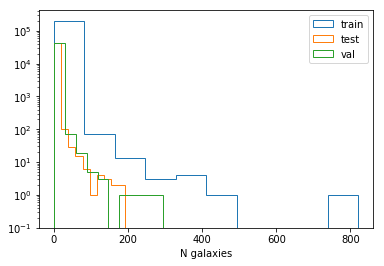

In [5]:
plt.hist(labels[train_idx,0], log=True, histtype='step', label = 'train')
plt.hist(labels[test_idx,0], log=True, histtype='step', label = 'test')
plt.hist(labels[val_idx,0], log=True, histtype='step', label = 'val')
plt.xlabel('N galaxies')
plt.legend()

In [6]:
m_train = G.ndata['feat'][train_idx, 0]
m_test = G.ndata['feat'][test_idx, 0]
m_val = G.ndata['feat'][val_idx, 0]

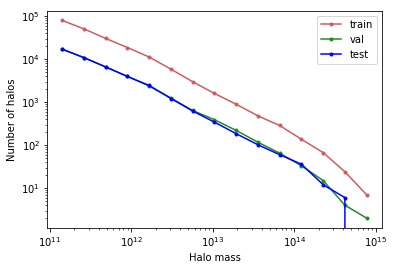

In [7]:

nbins= 15
bins = np.logspace(11, 15, nbins+1)

mass_func, edges = np.histogram(m_train, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='indianred', marker='o',markersize=3,
           label='train')

mass_func, edges = np.histogram(m_val, bins=bins)

plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='forestgreen', marker='o',markersize=3,
           label='val')

mass_func, edges = np.histogram(m_test, bins=bins)

plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='blue', marker='o',markersize=3,
           label='test')
plt.ylabel('Number of halos')
plt.xlabel('Halo mass')
plt.legend()